In [5]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [3]:


# Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for training and validation
)

train_data = data_gen.flow_from_directory(
    'dataset/training_set',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    'dataset/test_set',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Compiling the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluating the Model
eval_result = model.evaluate(val_data)
print(f"Validation Loss: {eval_result[0]} - Validation Accuracy: {eval_result[1]}")

# Saving the Model
model.save('cnn_image_classifier.h5')


Found 6400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 87s 427ms/step - accuracy: 0.5582 - loss: 1.0943 - val_accuracy: 0.5000 - val_loss: 1.0280 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 335ms/step - accuracy: 0.5913 - loss: 0.7527 - val_accuracy: 0.5050 - val_loss: 0.8503 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 371ms/step - accuracy: 0.6258 - loss: 0.6585 - val_accuracy: 0.6150 - val_loss: 0.6558 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 367ms/step - accuracy: 0.6636 - loss: 0.6148 - val_accuracy: 0.5950 - val_loss: 0.6525 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 92s 462ms/step - accuracy: 0.6739 - loss: 0.5878 - val_accuracy: 0.6675 - val_loss: 0.5902 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 75s 372ms/step - accuracy: 0.7014 - loss: 0.5733 - val_accuracy: 0.6500 - val_loss: 0.5994 - learning_

Validation Loss: 0.3319641053676605 - Validation Accuracy: 0.8550000190734863


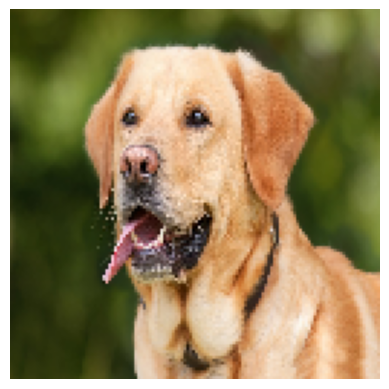

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Image: cat_or_dog_1.jpg -> Prediction: Dog


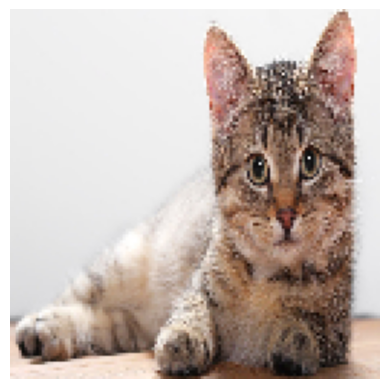

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: cat_or_dog_2.jpg -> Prediction: Cat


In [8]:
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(128, 128))
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    if prediction[0][0] < 0.5:
        return 'Dog'
    else:
        return 'Cat'

# Test predictions on images in the 'single_prediction' folder
for filename in os.listdir('dataset/single_prediction'):
    file_path = os.path.join('dataset/single_prediction', filename)
    if os.path.isfile(file_path):
        result = predict_image(file_path, model)
        print(f"Image: {filename} -> Prediction: {result}")

In [ ]:
#Medium link: https://medium.com/@saminyeaser1/image-classification-using-cnn-d1c4f27cc700

#Github Repo: https://github.com/SaminYeaser/Image-Classification-with-CNN.git